In [4]:
%pylab inline
import calcium_spikes as cs
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare

Populating the interactive namespace from numpy and matplotlib


### Walkthrough to gradient boosting calcium --> spike prediction code

In [5]:
data_dir = '/Users/Torben/Documents/cai-3_dataset/data/'
all_dat = cs.data_organization.load_data(data_dir)

all_calcium = all_dat[0]
all_spikes = all_dat[1]
all_loc= all_dat[2]
all_bs = all_dat[3]
all_ind = all_dat[4]
all_cell_ind = all_dat[5]

22 cells loaded


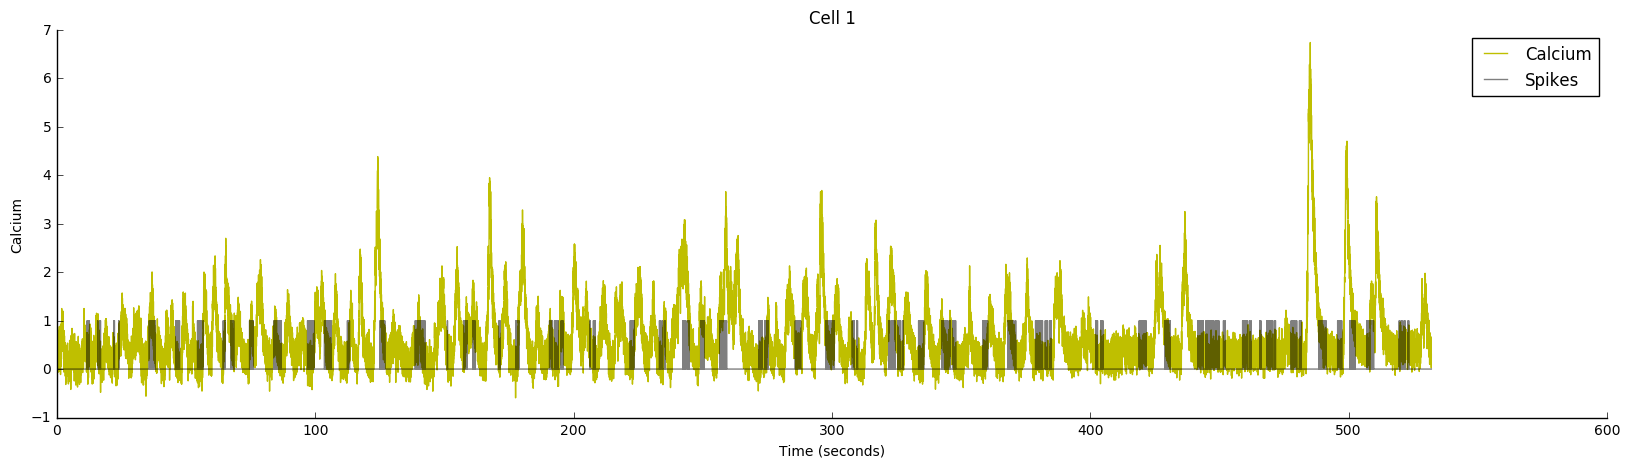

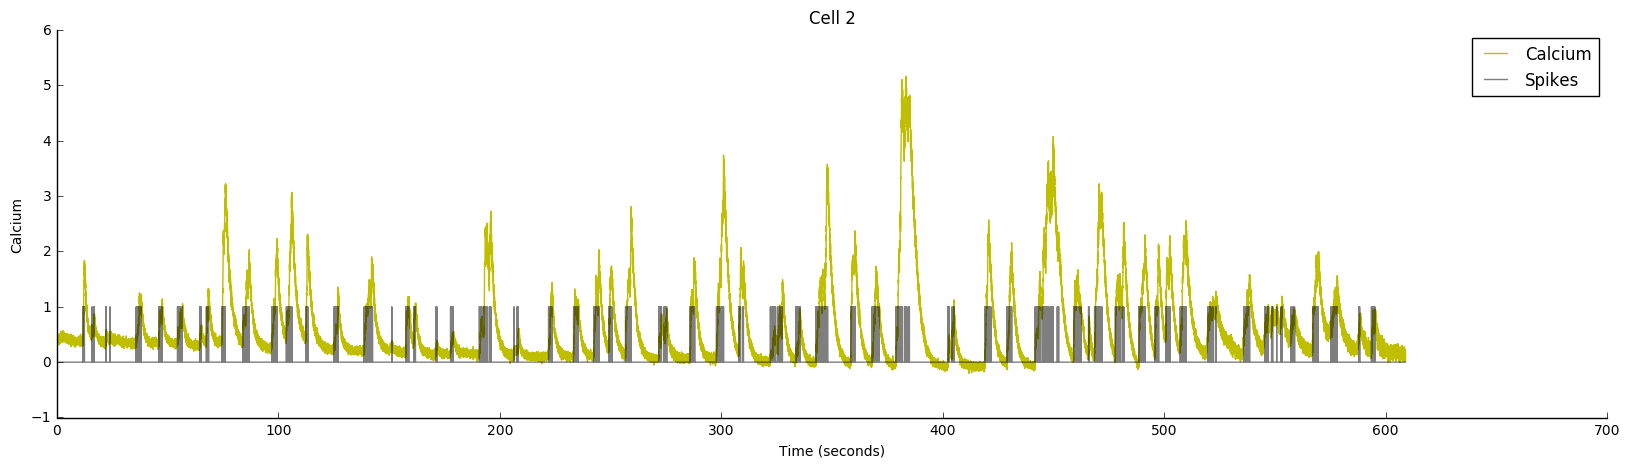

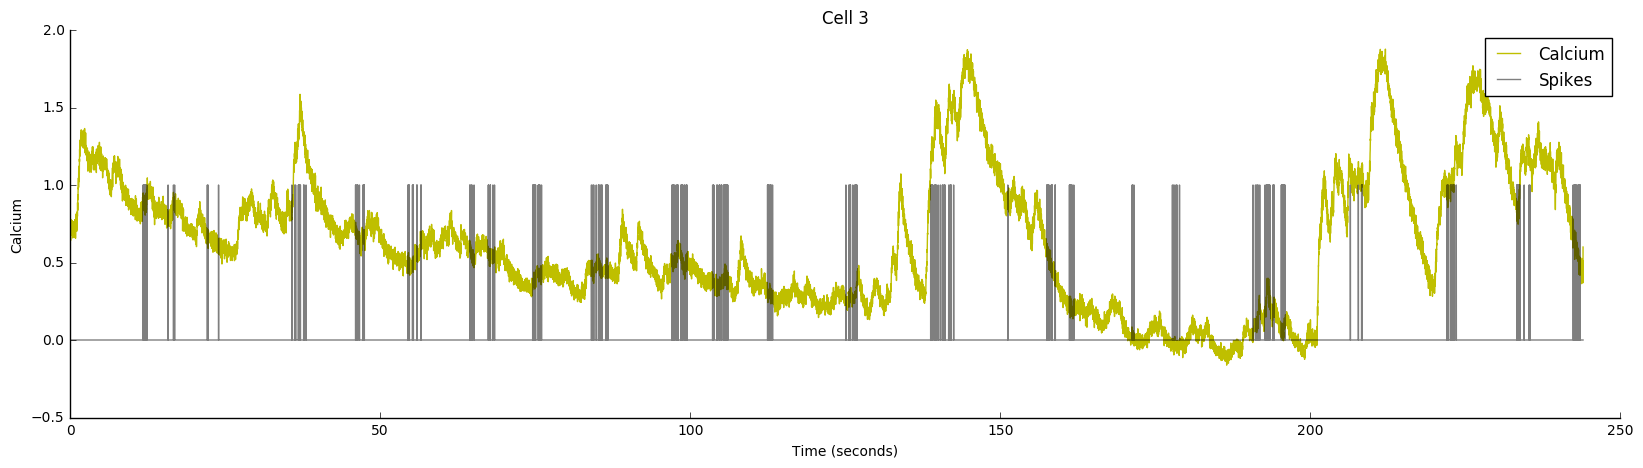

In [26]:
### What data looks like
outpath = '/Users/Torben/Code/calcium_spikes/figures/'
this_cell=0
fig1 = cs.plotting_functions.plot_dat_seg(all_calcium[all_cell_ind==this_cell],spikes=all_spikes[all_cell_ind==1],inds=[0,len(all_calcium[all_cell_ind==this_cell])], fig_title='Cell 1')
fig1.savefig(outpath+'cell_1.eps',dpi=300)

this_cell=1
fig2 = cs.plotting_functions.plot_dat_seg(all_calcium[all_cell_ind==this_cell],spikes=all_spikes[all_cell_ind==1],inds=[0,len(all_calcium[all_cell_ind==this_cell])], fig_title='Cell 2')
fig2.savefig(outpath+'cell_2.eps',dpi=300)
this_cell=2
fig3 = cs.plotting_functions.plot_dat_seg(all_calcium[all_cell_ind==this_cell],spikes=all_spikes[all_cell_ind==1],inds=[0,len(all_calcium[all_cell_ind==this_cell])], fig_title='Cell 3')
fig3.savefig(outpath+'cell_3.eps',dpi=300)

In [7]:
complete_feature_mat = cs.data_organization.build_feature_mat(all_calcium, all_loc, all_ind, all_bs)
X_train,X_test,y_train,y_test = cs.data_organization.build_train_test_sets(complete_feature_mat,all_spikes, ceil_spikes=True, subsample=None, test_size=.2)

(624865, 62)

In [8]:
# gotten from brute force optimization
best_params = {'objective': "binary:logistic",
               'eval_metric':"error",
                'eta': 1,
                'alpha' : 0.1,
                'lambda':0.1,
                'gamma':0, 
                'max_depth': 5,
                'seed': 16,
                'silent': 1,
                'missing': '-999.0',
                'colsample_bytree':.5
                }

Yr,Yt,model = cs.boosting.binary_booster(X_train,X_test,y_train,y_test,params=best_params)

In [9]:
from sklearn.metrics import confusion_matrix

In [10]:
#

train_measures,test_measures = cs.output_analysis.calculate_all_accuracy(y_train, y_test, Yr, Yt)


/Users/Torben/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3003: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/Torben/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3004: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


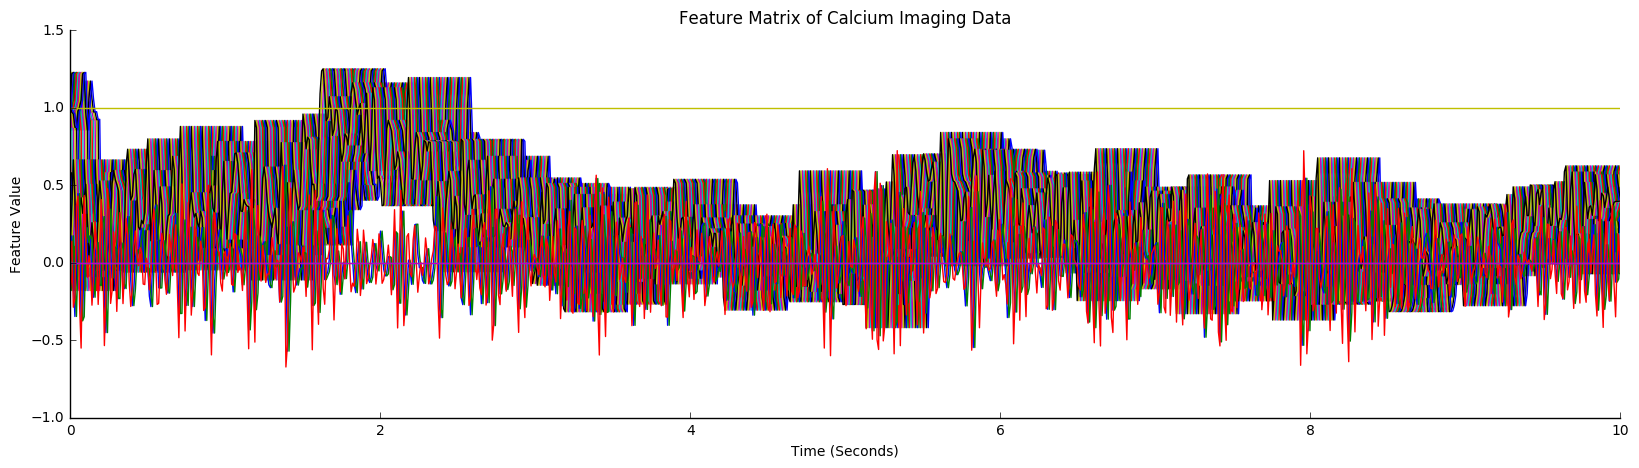

In [27]:
fig = cs.plotting_functions.plot_feature_mat(complete_feature_mat);

fig.savefig(outpath+'feature_mat.eps',dpi=300)

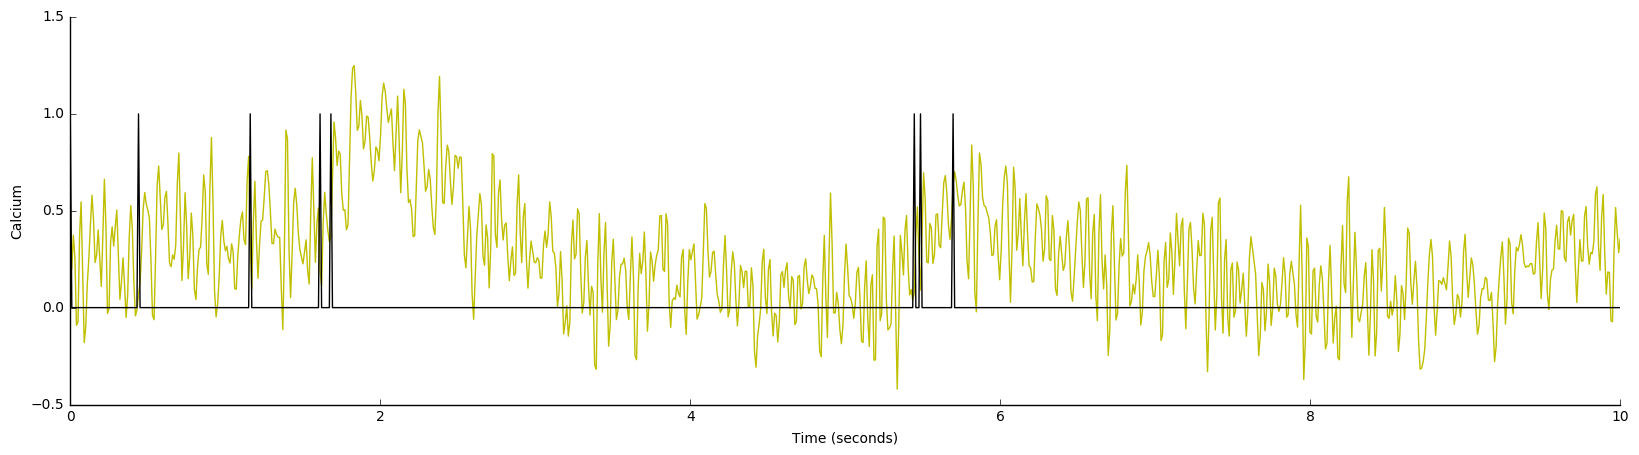

In [10]:
cs.plotting_functions.plot_dat_seg(all_calcium,spikes=all_spikes);

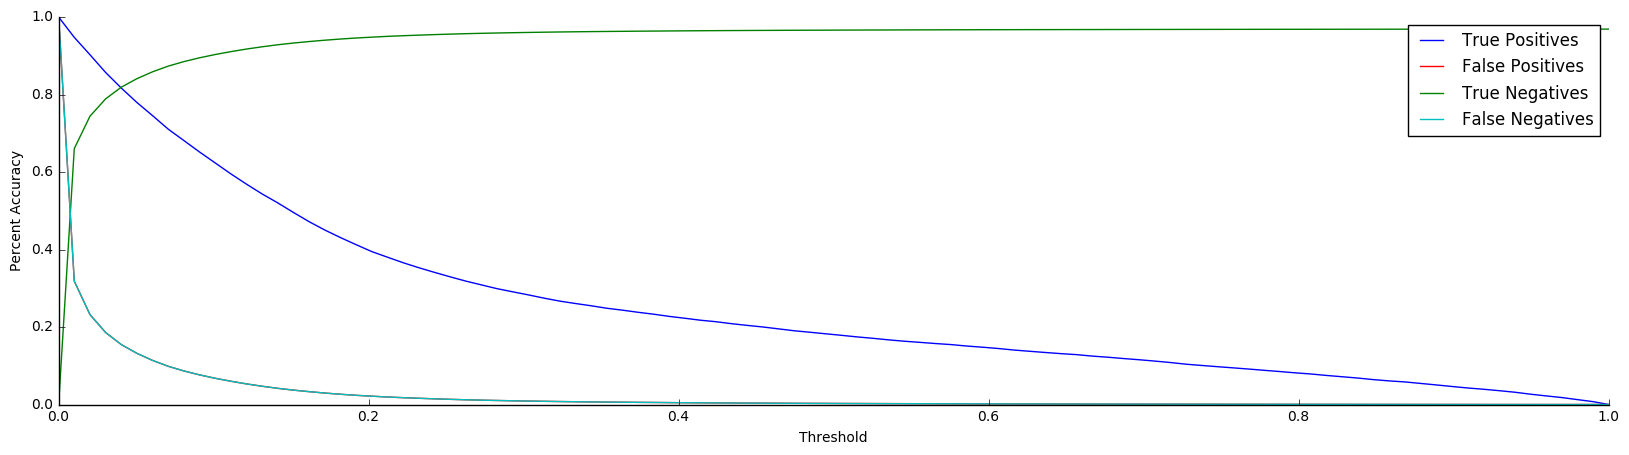

In [28]:
fig = cs.plotting_functions.plot_all_accuracies(train_measures);
fig.savefig(outpath+'xgboost_acc.eps',dpi=300)

In [69]:
# calculating some accuracy metrics
cm = confusion_matrix(y_test, Yt>0.1)

true_neg_rate = cm[0,0]/float(cm[0,0]+cm[0,1])
true_pos_rate = cm[1,1]/float(cm[1,1]+cm[1,0])
precis = 1673/float(11801+1673)
accuracy = (cm[0,0]+cm[1,1])/float(len(y_test))
print true_neg_rate
print true_pos_rate
print accuracy

correct_vals = cm[0,0]+cm[1,1]
incorrect_vals = cm[1,0]+cm[0,1]
chance_val = np.floor(len(y_test/2.0))

print chisquare([correct_vals,incorrect_vals])

[[139634  11801]
 [  3109   1673]]
0.922072176181
0.349853617733
0.904555842194


In [14]:
train_metrics, test_metrics, [train_scores, test_scores] = cs.output_analysis.calculate_accuracy_metrics(y_train,y_test, Yr, Yt,myceil=0.1)

Train correlation: 0.346
Test correlation: 0.167
Training Accuracy:
0 spikes: 563884 True Positive (0.9315%). 7292 False Positive (0.3736%). 563884 True Negative (0.9024%). 41462 False Negative (2.1242%). 605346 Total. 
1 spikes: 12227 True Positive (0.6264%). 41462 False Positive (0.0685%). 563884 True Negative (0.9024%). 41462 False Negative (0.0685%). 19519 Total. 
Testing Accuracy:
0 spikes: 139634 True Positive (0.9221%). 3109 False Positive (0.6501%). 139634 True Negative (0.8938%). 11801 False Negative (2.4678%). 151435 Total. 
1 spikes: 1673 True Positive (0.3499%). 11801 False Positive (0.0779%). 139634 True Negative (0.8938%). 11801 False Negative (0.0779%). 4782 Total. 


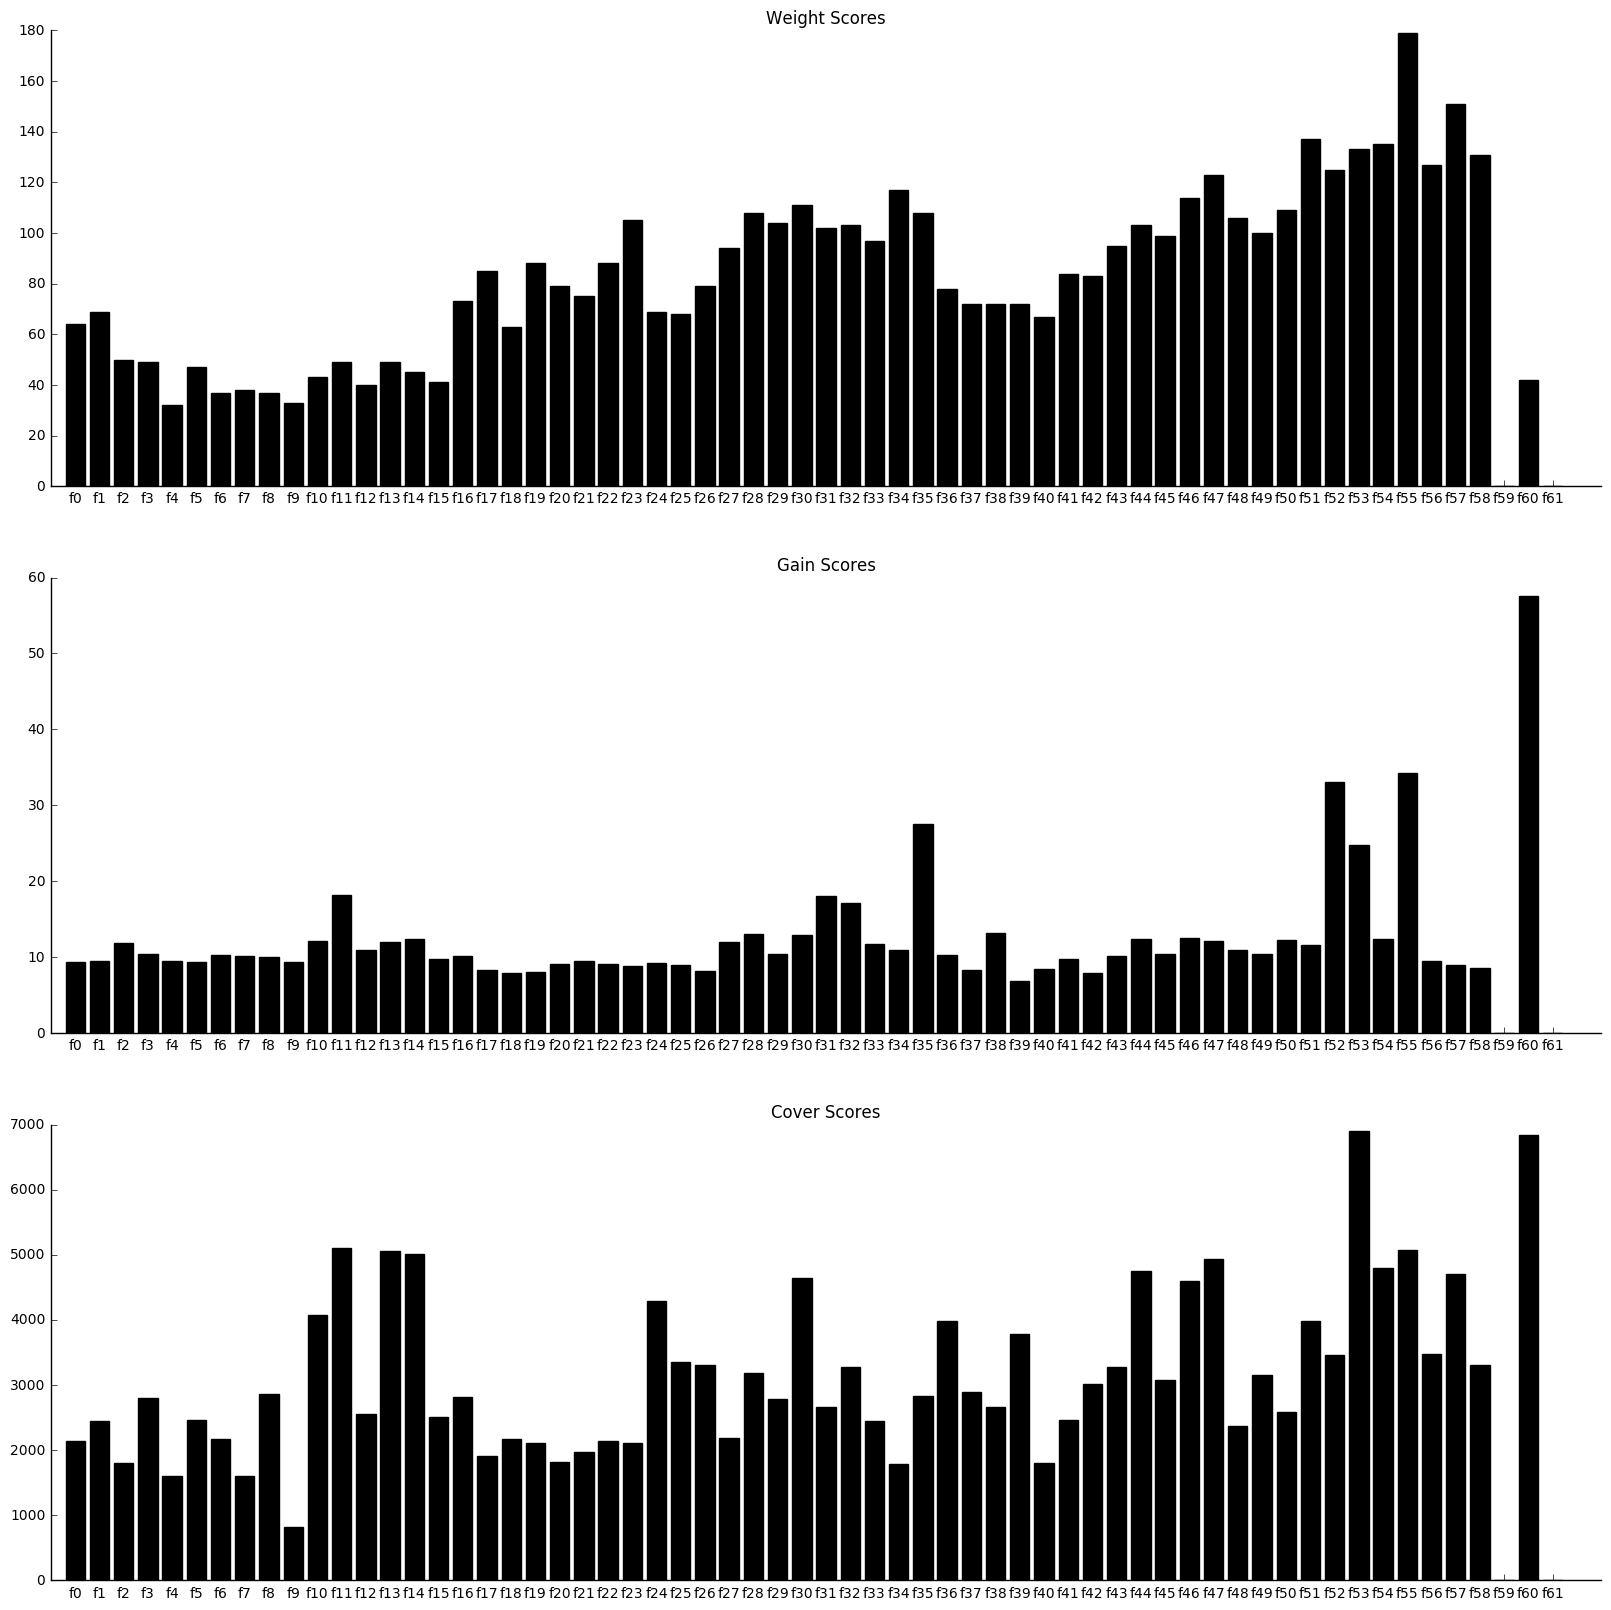

In [29]:
fig = cs.plotting_functions.plot_feature_importance(model);
fig.savefig(outpath+'feature_importance.eps',dpi=300)